In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Peak detection Trøndelag

In [2]:
mob_data = pd.read_csv("../datasets/joined_mobdata.zip", compression='zip')
mob_data.tid = pd.to_datetime(mob_data.tid)


In [3]:
mob_data.index = mob_data.tid

mob_data.tail()

,Unnamed: 0,tid,hastighet_ned,hastighet_opp,lengdegrad,breddegrad,klient_type,teknologi,ip_as_name,nettverkstype,...,nat_type,public_ip_asn,public_ip_as_name,num_threads_requested,num_threads,ping_median,index_right,navn,kommunenummer,pop_density
tid,,,,,,,,,,,,,,,,,,,,,
2021-12-31 23:17:00,698911,2021-12-31 23:17:00,97.623,90.775,5.373009,60.358169,MOBILE,WLAN,"NEXTGENTEL NEXTGENTEL Autonomous System, NO",99,...,no_nat_ipv6,15659.0,"NEXTGENTEL NEXTGENTEL Autonomous System, NO",5,5,12.486793,66.0,Bergen,4601,high
2021-12-31 23:23:00,698912,2021-12-31 23:23:00,3.327,3.074,8.924828,61.243973,MOBILE,WLAN,"UNINETT UNINETT, The Norwegian University & Re...",99,...,no_nat_ipv6,224.0,"UNINETT UNINETT, The Norwegian University & Re...",5,5,120.024530,172.0,Øystre Slidre,3453,low
2021-12-31 23:31:00,698913,2021-12-31 23:31:00,11.760,0.523,9.081866,63.303323,MOBILE,4G,"NETCOM-AS Oslo, Norway, NO",13,...,nat_public_to_public_ipv4,12929.0,"NETCOM-AS Oslo, Norway, NO",5,5,40.067356,167.0,Heim,5055,low
2021-12-31 23:33:00,698914,2021-12-31 23:33:00,425.174,381.112,9.081949,63.303292,MOBILE,WLAN,"ASN-CATCHCOM, NO",99,...,nat_local_to_public_ipv4,2116.0,"ASN-CATCHCOM, NO",5,5,13.364462,167.0,Heim,5055,low
2021-12-31 23:43:00,698915,2021-12-31 23:43:00,71.102,54.179,9.960188,63.416586,MOBILE,WLAN,"ASN-CATCHCOM, NO",99,...,nat_local_to_public_ipv4,2116.0,"ASN-CATCHCOM, NO",5,5,14.156233,177.0,Orkland,5059,low


## Deviding Trøndelag into areas

In [4]:
area1 = ['Trondheim', 'Melhus', 'Skaun']
area2 = ['Orkland', 'Heim', 'Hitra', 'Rindal', 'Rennebu', 'Oppdal']
area3 = ['Ørland', 'Indre Fosen', 'Åfjord', 'Inderøy', 'Frøya' ]
area4 = ['Røros', 'Holtålen', 'Tydal', 'Midtre Gauldal', 'Selbu']
area5 = ['Malvik', 'Stjørdal', 'Meråker', 'Frosta', 'Levanger', 'Verdal']
area6 = ['Steinkjer', 'Namsos', 'Osen', 'Flatanger', 'Nærøysund', 'Leka']
area7 = ['Snåase', 'Lierne', 'Grong', 'Overhalla', 'Høylandet', 'Namsskogan', 'Raarvihke']

a1_df = mob_data[mob_data['navn'].isin(area1)]
a2_df = mob_data[mob_data['navn'].isin(area2)]
a3_df = mob_data[mob_data['navn'].isin(area3)]
a4_df = mob_data[mob_data['navn'].isin(area4)]
a5_df = mob_data[mob_data['navn'].isin(area5)]
a6_df = mob_data[mob_data['navn'].isin(area6)]
a7_df = mob_data[mob_data['navn'].isin(area7)]         

In [5]:
# counting the daily measurments
a1_count = a1_df['hastighet_ned'].resample('D').count()
a2_count = a2_df['hastighet_ned'].resample('D').count()
a3_count = a3_df['hastighet_ned'].resample('D').count()
a4_count = a4_df['hastighet_ned'].resample('D').count()
a5_count = a5_df['hastighet_ned'].resample('D').count()
a6_count = a6_df['hastighet_ned'].resample('D').count()
a7_count = a7_df['hastighet_ned'].resample('D').count()

### Plotting

In [6]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


In [7]:
a7_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1063 entries, 2018-01-10 14:01:00 to 2021-12-27 15:53:00
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             1063 non-null   int64         
 1   tid                    1063 non-null   datetime64[ns]
 2   hastighet_ned          1063 non-null   float64       
 3   hastighet_opp          1063 non-null   float64       
 4   lengdegrad             1063 non-null   float64       
 5   breddegrad             1063 non-null   float64       
 6   klient_type            1063 non-null   object        
 7   teknologi              1063 non-null   object        
 8   ip_as_name             1055 non-null   object        
 9   nettverkstype          1063 non-null   int64         
 10  landkode               1056 non-null   object        
 11  land_geoip             1063 non-null   object        
 12  tilbyder               190

In [8]:
a2_count

tid
2018-01-01     1
2018-01-02     0
2018-01-03     2
2018-01-04     2
2018-01-05     7
              ..
2021-12-27     1
2021-12-28     5
2021-12-29     1
2021-12-30     3
2021-12-31    13
Freq: D, Name: hastighet_ned, Length: 1461, dtype: int64

In [9]:
a3_count

tid
2018-01-01     1
2018-01-02     3
2018-01-03     5
2018-01-04     2
2018-01-05     5
              ..
2021-12-27    17
2021-12-28     3
2021-12-29     6
2021-12-30     1
2021-12-31     1
Freq: D, Name: hastighet_ned, Length: 1461, dtype: int64

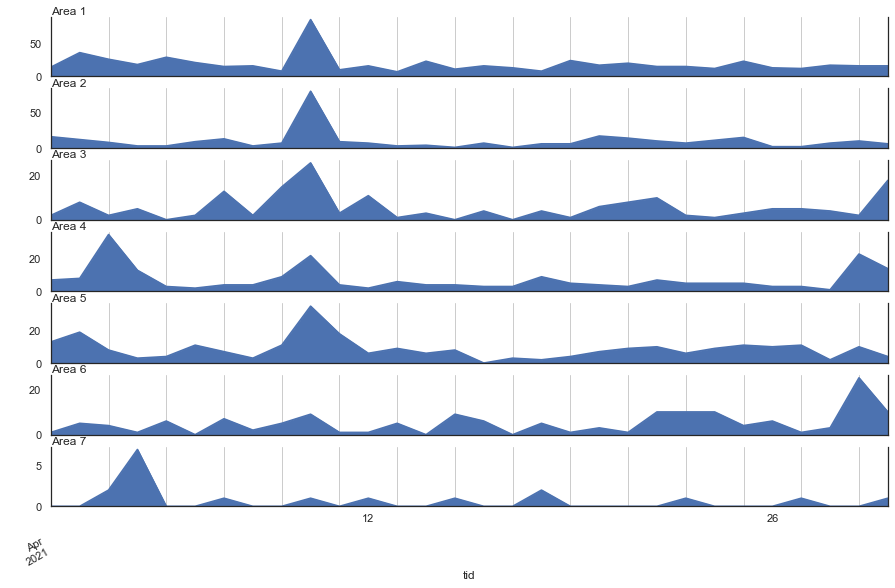

In [10]:
from_date= '2021-04'
to_date= '2021-04'
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(15,10))
a1_count.loc[from_date: to_date].plot(ax=axes[0], kind='area')
a2_count.loc[from_date: to_date].plot(ax=axes[1], kind='area')
a3_count.loc[from_date: to_date].plot(ax=axes[2], kind='area')
a4_count.loc[from_date: to_date].plot(ax=axes[3], kind='area')
a5_count.loc[from_date: to_date].plot(ax=axes[4], kind='area')
a6_count.loc[from_date: to_date].plot(ax=axes[5], kind='area')
a7_count.loc[from_date: to_date].plot(ax=axes[6], kind='area')
major_ticks = np.arange(from_date, '2021-05',2, dtype='datetime64[D]')
for i, ax in enumerate(axes):
    ax.spines['top'].set_visible(False)
    ax.set_title("Area " + str(i+1), loc='left', pad =2)
    ax.set_xticks(major_ticks,)
    ax.grid(axis='x')
plt.gcf().autofmt_xdate()    
plt.show()


### Ser om spikes skjer andre steder i landet

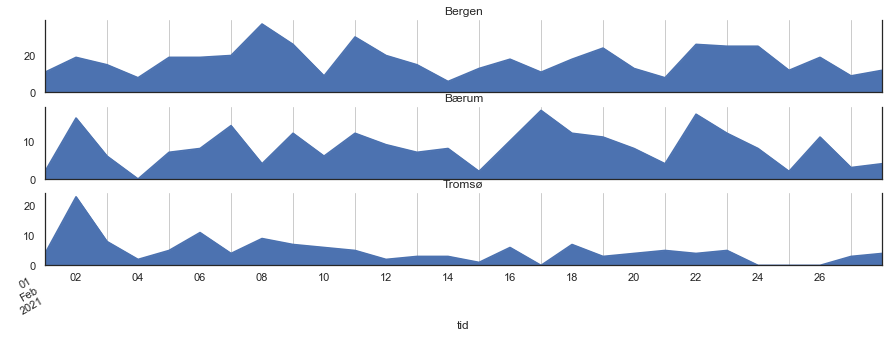

In [11]:
berg_df = mob_data[mob_data.navn == 'Bergen']
bær_df = mob_data[mob_data.navn == 'Bærum']
trom_df = mob_data[mob_data.navn == 'Tromsø']


berg_count =berg_df['hastighet_ned'].resample('D').count()
bær_count = bær_df['hastighet_ned'].resample('D').count()
trom_count = trom_df['hastighet_ned'].resample('D').count()



from_date2= '2021-02'
to_date2= '2021-02'
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(15,5))
berg_count.loc[from_date2: to_date2].plot(ax=axes[0], kind='area', title="Bergen")
bær_count.loc[from_date2: to_date2].plot(ax=axes[1], kind='area', title='Bærum')
trom_count.loc[from_date2: to_date2].plot(ax=axes[2], kind='area', title='Tromsø')

major_ticks_2 = np.arange(from_date2, '2021-03',2, dtype='datetime64[D]')
for i, ax in enumerate(axes):
    ax.spines['top'].set_visible(False)
    ax.set_xticks(major_ticks_2)
    ax.grid(axis='x')
plt.gcf().autofmt_xdate()    
plt.show()

In [ ]:
tenth_df.info()

In [ ]:
tenth_df.describe()

In [ ]:
tenth_df['teknologi'].value_counts()

In [ ]:
tenth_df['ip_as_name'].value_counts()

In [ ]:
tenth_df['public_ip_as_name'].value_counts()

In [ ]:
trøndelag_df = mob_data[mob_data['navn'].isin(area1+area2+area3+area4+area5+area6+area7)]

In [ ]:
trøndelag_df.info()

In [ ]:
ax = trøndelag_df.loc['2021-04'].resample('D').count().plot(figsize=(15,10))
ax.legend(loc='best', fancybox=True, framealpha=0.5, facecolor='lightgray')

In [ ]:
trøndelag_df['teknologi'].value_counts()

In [ ]:
ax = trøndelag_df['hastighet_opp'].loc['2021-04'].resample('D').median().plot(figsize=(20,5))

# Baseline and threshold analysis count 

In [15]:
#combine all area counts into one DF
date_index = pd.date_range(start='2018-01-01', end='2021-12-31', freq='D')
count_area_df = pd.DataFrame(index=pd.DatetimeIndex(data=date_index))

count_area_df = pd.concat([count_area_df, a1_count,a2_count, a3_count, a4_count, a5_count, a6_count, a7_count], axis=1, ignore_index=True)
count_area_df.columns = ['a1', 'a2', 'a3','a4','a5','a6','a7']
# start and begining of series contains nan values. Fill with zeros. 
count_area_df = count_area_df.fillna(0)

count_area_df[['a4', 'a7']] = count_area_df[['a4', 'a7']].astype('int')
count_area_df.head()

,a1,a2,a3,a4,a5,a6,a7
2018-01-01,11,1,1,0,1,1,0
2018-01-02,3,0,3,0,0,0,0
2018-01-03,1,2,5,0,5,0,0
2018-01-04,4,2,2,3,11,0,0
2018-01-05,19,7,5,4,13,2,0


In [16]:
# rolling mean and std of the last month in all areas
rolling_count_df = count_area_df.rolling(60).mean().bfill()
rolling_std_df = count_area_df.rolling(60).std().bfill()

rolling_count_df = pd.merge(rolling_count_df, rolling_std_df, left_index=True, right_index=True, suffixes=('_mean', '_std'))
rolling_count_df = rolling_count_df.join(count_area_df)
rolling_count_df

,a1_mean,a2_mean,a3_mean,a4_mean,a5_mean,a6_mean,a7_mean,a1_std,a2_std,a3_std,...,a5_std,a6_std,a7_std,a1,a2,a3,a4,a5,a6,a7
2018-01-01,8.850000,2.816667,3.716667,0.700000,1.966667,2.283333,0.466667,11.110882,3.642925,4.318238,...,2.881658,3.737541,1.333616,11,1,1,0,1,1,0
2018-01-02,8.850000,2.816667,3.716667,0.700000,1.966667,2.283333,0.466667,11.110882,3.642925,4.318238,...,2.881658,3.737541,1.333616,3,0,3,0,0,0,0
2018-01-03,8.850000,2.816667,3.716667,0.700000,1.966667,2.283333,0.466667,11.110882,3.642925,4.318238,...,2.881658,3.737541,1.333616,1,2,5,0,5,0,0
2018-01-04,8.850000,2.816667,3.716667,0.700000,1.966667,2.283333,0.466667,11.110882,3.642925,4.318238,...,2.881658,3.737541,1.333616,4,2,2,3,11,0,0
2018-01-05,8.850000,2.816667,3.716667,0.700000,1.966667,2.283333,0.466667,11.110882,3.642925,4.318238,...,2.881658,3.737541,1.333616,19,7,5,4,13,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,15.000000,6.700000,4.550000,4.700000,7.950000,3.850000,0.600000,7.229881,5.119918,4.163705,...,6.107581,2.910093,1.152742,13,1,17,4,3,0,1
2021-12-28,14.833333,6.666667,4.550000,4.683333,7.916667,3.916667,0.600000,7.157233,5.124440,4.163705,...,6.112759,2.912810,1.152742,13,5,3,2,6,6,0
2021-12-29,14.616667,6.600000,4.466667,4.850000,7.833333,3.900000,0.600000,7.225406,5.172286,4.081652,...,6.159371,2.891835,1.152742,6,1,6,10,2,7,0
2021-12-30,14.833333,6.600000,4.450000,4.833333,7.883333,3.950000,0.600000,7.369582,5.172286,4.093919,...,6.131584,2.901928,1.152742,26,3,1,6,6,6,0


In [17]:
# making threshold based on standard deviation for each area- Threshold at 2 times std. 

stationary_std= []
for a in range(1,8):
    mean= rolling_count_df['a'+str(a)+'_mean']
    std = rolling_count_df['a'+str(a)+'_std']
    st_std = count_area_df['a'+str(a)].std()
    
    rolling_count_df['a'+str(a)+'_trh'] =2*mean +std
    rolling_count_df['a'+str(a)+'_trh2'] = 3*mean
    rolling_count_df['a'+str(a)+'_trh3'] = 2*mean + st_std
    
    # making a lower threshold to make a "high" class that is not a peak
    rolling_count_df['a'+str(a)+'_ltrh'] =mean +std

    
    
    stationary_std.append(st_std)

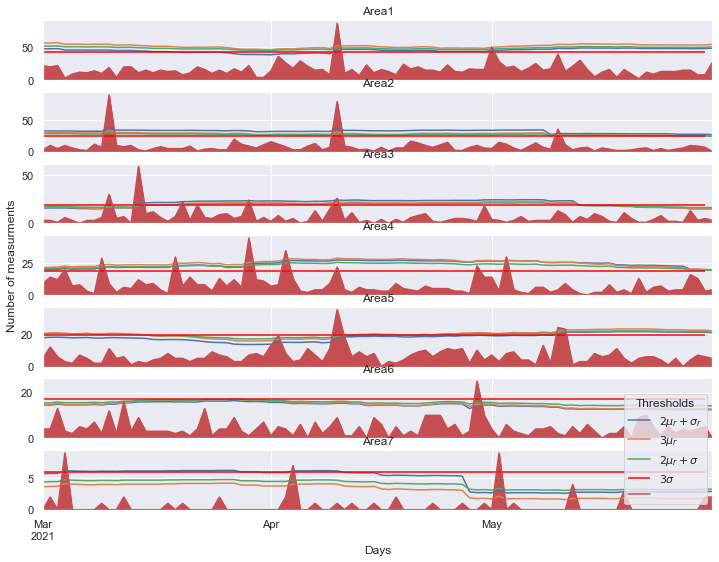

In [18]:
apr = rolling_count_df.loc['2021-03':'2021-05']
apr_c = count_area_df.loc['2021-03':'2021-05']
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(12,9))
for i in range(7):
    area = 'a'+str(i+1)
    #apr[area +'_mean'].plot( ax= axes[i])
    apr[area + '_trh'].plot(ax=axes[i])
    apr[area + '_trh2'].plot(ax=axes[i])
    apr[area + '_trh3'].plot(ax=axes[i])
    axes[i].hlines(y= 3* stationary_std[i], xmin='2021-03-1', xmax='2021-05-30', color='red', label='stationar std')
    apr_c[area].plot(ax=axes[i], kind='area')
    axes[i].set_title('Area' + str(i+1)) 
    axes[3].set_ylabel("Number of measurments")
    plt.xlabel("Days")
    
    

plt.legend(labels=[ '$2\mu_r+\sigma_r$','$3\mu_r$','$2\mu_r + \sigma$', '$3\sigma$' ,''], title='Thresholds')
#plt.tight_layout()
#plt.savefig('figs/peak_det/threshold_comparison')
plt.show()


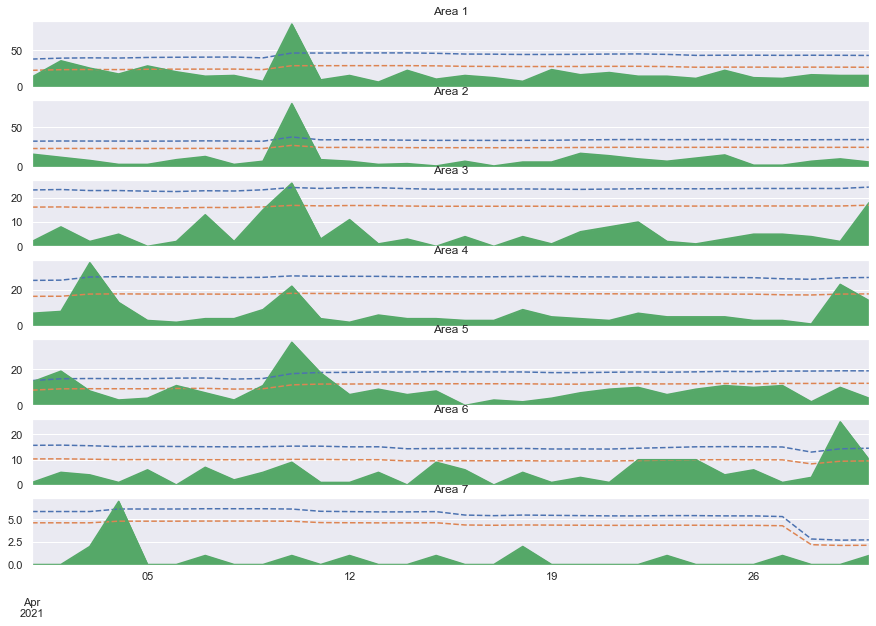

In [19]:
# ploting "high" thrs. and "peak" thrs. 
apr = rolling_count_df.loc['2021-04']
apr_c = count_area_df.loc['2021-04']
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(nrows=7, sharex=True, figsize=(15,10))
for i in range(7):
    axes[i].set_title("Area "+ str(i+1))
    area = 'a'+str(i+1)
    #apr[area +'_mean'].plot( ax= axes[i], style="--")
    apr[area + '_trh'].plot(ax=axes[i], style="--")
    apr[area + '_ltrh'].plot(ax=axes[i], style="--")
    apr_c[area].plot(ax=axes[i], kind='area')

In [20]:
# apply threshold to functions and record peaks 
# peak if larger than threshold
# high if larger than low threshold
# and the area must have over 10 measuments that day to be classified as high or  

# Then map to numeric values: 2 for peak, 1 for high, 0 for other (low/normal) 


def numeric_mapping(row, area):
    if row[area+'_peak']:
        return 2
    elif row[area+'_high']:
        return 1
    else:
        return 0


peaks_df = pd.DataFrame(index=pd.DatetimeIndex(date_index))
for i in range(7):
    area = 'a'+str(i+1)
    # check for peak and high values and return boolean series
    peaks_df[area+'_peak'] = (rolling_count_df[area+'_trh'] < count_area_df[area] ) & (count_area_df[area] > 10)
    peaks_df[area+'_high'] = (rolling_count_df[area+'_ltrh'] < count_area_df[area] ) & (count_area_df[area] > 10)
    
    # map boolean to numbers
    peaks_df[area] = peaks_df.apply( lambda row : numeric_mapping(row , area), axis=1)

# only return numeric values
peaks_df = peaks_df[['a1','a2','a3','a4','a5','a6','a7']]

peaks_df.loc['2021-01']

,a1,a2,a3,a4,a5,a6,a7
2021-01-01,0,0,0,0,0,0,0
2021-01-02,0,0,0,0,0,0,0
2021-01-03,1,0,0,0,0,0,0
2021-01-04,0,0,1,1,0,0,0
2021-01-05,0,0,1,0,0,0,0
2021-01-06,0,0,0,0,0,0,0
2021-01-07,0,0,0,0,0,0,0
2021-01-08,0,0,0,0,0,0,0
2021-01-09,0,0,0,0,0,0,0
2021-01-10,0,2,2,1,0,0,0


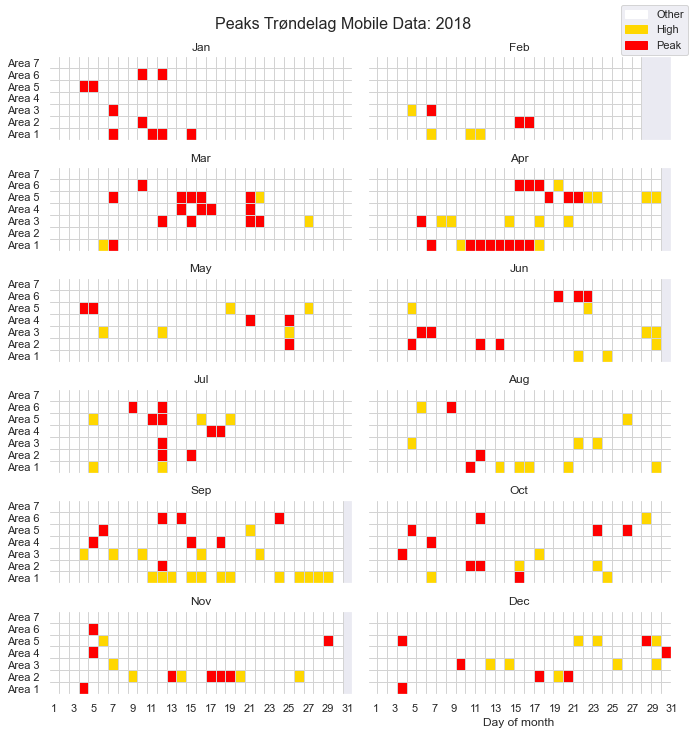

In [21]:
import calendar
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots( sharex=True, sharey=True,figsize=(9.69,10.27), nrows =6, ncols= 2)
colors =["white", "gold", "red"]
labels = ["Other", "High", "Peak"]
year=2018
row = 0
for i in range(12):
        col = i%2
        month = i+1
        s = str(month) if month >= 10 else '0'+ str(month)
        data = peaks_df.loc[str(year)+"-"+s]
        cmap1 =ListedColormap(colors)
        ax[row, col].grid(False)
        x = np.arange(len(data))+1
        y = np.arange(7) + 1
        X,Y = np.meshgrid(x,y)
        ax[row, col].pcolormesh(X, Y, data.values.transpose(), cmap=cmap1, edgecolor = 'lightgray', linewidth = 0.5)
        ax[row, col].set_title(calendar.month_abbr[month])
        row+=col
#plot legend
handels= []
for i in range(len(colors)):
    handels.append(mpatches.Patch(color=colors[i], label=labels[i]))
fig.legend(handles=handels, loc='upper right')

# handle ticks
plt.xticks(ticks=list(range(1,32, 2)), ha='left')
plt.yticks(ticks=list(range(1,8, 1)), ha='left', labels=['Area 1','Area 2','Area 3','Area 4','Area 5','Area 6','Area 7',])

plt.xlabel("Day of month")
fig.suptitle('Peaks Trøndelag Mobile Data: ' + str(year), fontsize=16)


plt.tight_layout()
plt.savefig('figs/peak_det/full_years/mob_peaks_' + str(year))
plt.show()

In [23]:
# count number of simultanious peak each date
num_of_peaks = peaks_df[peaks_df==2].count(axis=1)
num_of_peaks.value_counts()

0    1166
1     246
2      43
3       4
4       2
dtype: int64

In [24]:
#the dates in 2021 with more than 1 peak 
num_of_peaks.loc['2021'][num_of_peaks >= 2].sort_values(ascending=False)

2021-04-10    4
2021-08-10    3
2021-10-10    3
2021-01-10    2
2021-02-27    2
2021-03-10    2
2021-03-29    2
2021-05-10    2
2021-07-10    2
2021-07-17    2
2021-09-04    2
2021-09-10    2
2021-10-14    2
2021-12-10    2
dtype: int64

Between the start of 2018 until the end of 2021. 246 days where recorded with  1 peak. 43 days with 2 peaks. 4 days with 3 peaks. 2 days with 4 peaks!